In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/from-data-entry-to-ceo-the-ai-job-threat-index/My_Data.csv')
df['impact_pct'] = df['AI Impact'].apply(lambda x: int(x.strip('%')))
# we have a handful of infinite values
df['AI_Workload_Ratio'] = df['AI_Workload_Ratio'].apply(lambda x: 0.0 if x > 1 else x)
df = df.rename(columns={'Job titiles': 'Job title'})
df.head()

,Job title,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain,impact_pct
0,Communications Manager,98%,365,2546,0.143362,Communication & PR,98
1,Data Collector,95%,299,2148,0.139199,Data & IT,95
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical,95
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy,95
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare,92


In [2]:
sorted(df['AI_Workload_Ratio'].values)[:10]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0365853658536585,
 0.0451127819548872,
 0.0464547677261613]

<Axes: >

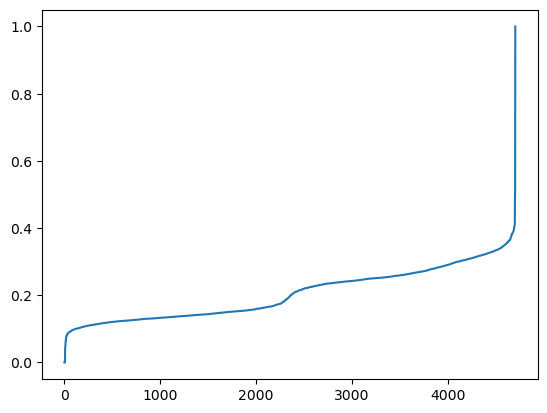

In [3]:
df[['AI_Workload_Ratio']].sort_values(by=['AI_Workload_Ratio']).reset_index()['AI_Workload_Ratio'].plot()

In [4]:
df.shape

(4706, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job title          4706 non-null   object 
 1   AI Impact          4706 non-null   object 
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
 6   impact_pct         4706 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 257.5+ KB


In [6]:
df['Domain'].nunique()

10

<Axes: ylabel='Frequency'>

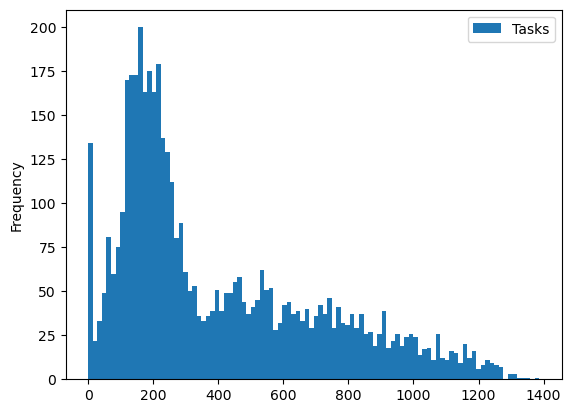

In [7]:
df['Tasks'].plot.hist(bins=100, legend=True, log=False)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


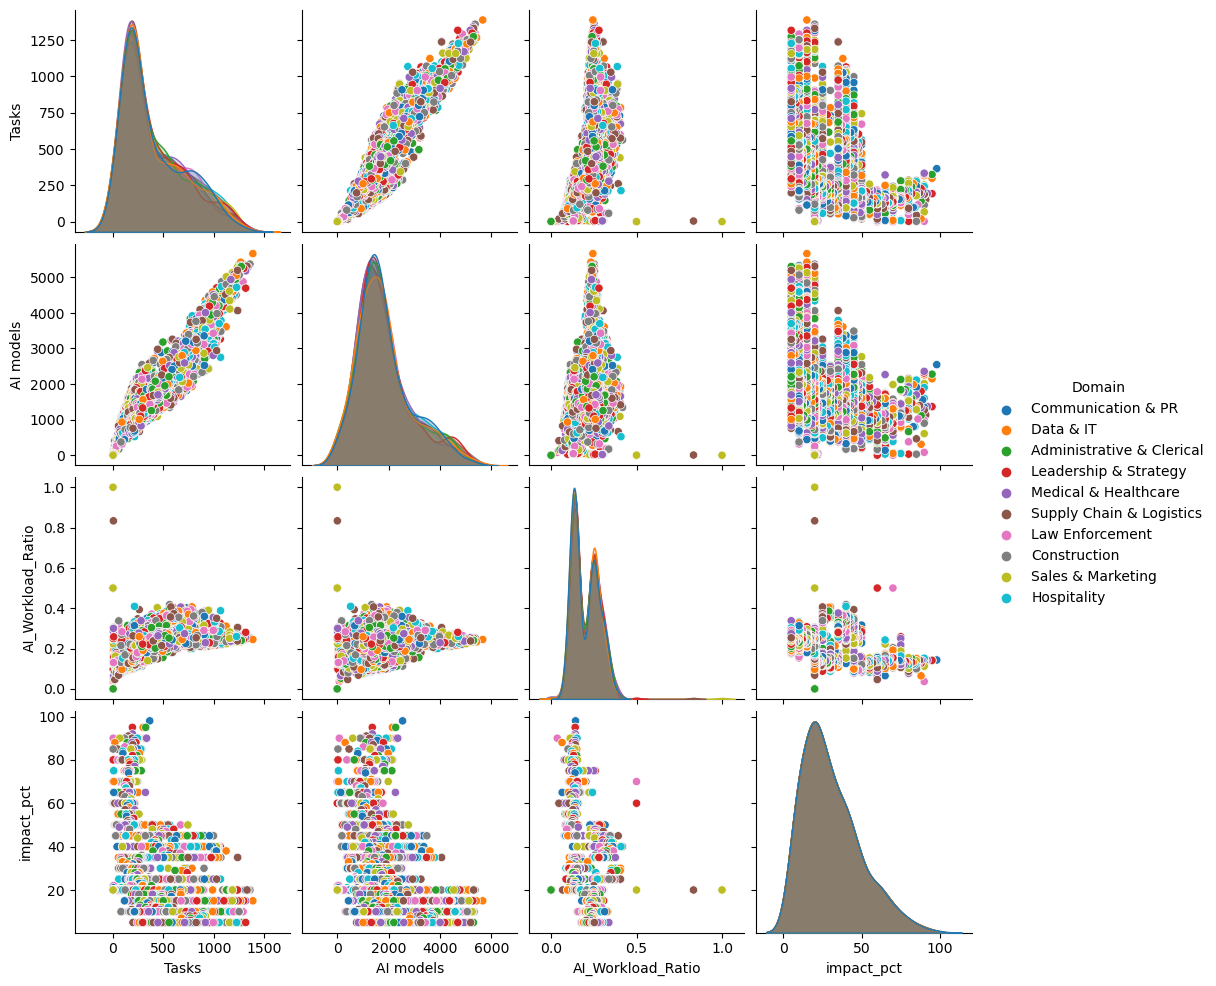

In [8]:
from seaborn import pairplot
pairplot(data=df, hue='Domain')

Tasks and AI models look highly correlated and all the distributions (on the diagonal) look very similar regardless of domain. We are probably not going to be able to cluster these easily with the available information into domain clusters.

In [9]:
columns = [key for key, value in df.dtypes.to_dict().items() if value != 'object']
columns

['Tasks', 'AI models', 'AI_Workload_Ratio', 'impact_pct']

In [10]:
import itertools
c = list(itertools.combinations(columns, 2)) + list(itertools.combinations(columns, 3)) + [tuple(columns)]

c

[('Tasks', 'AI models'),
 ('Tasks', 'AI_Workload_Ratio'),
 ('Tasks', 'impact_pct'),
 ('AI models', 'AI_Workload_Ratio'),
 ('AI models', 'impact_pct'),
 ('AI_Workload_Ratio', 'impact_pct'),
 ('Tasks', 'AI models', 'AI_Workload_Ratio'),
 ('Tasks', 'AI models', 'impact_pct'),
 ('Tasks', 'AI_Workload_Ratio', 'impact_pct'),
 ('AI models', 'AI_Workload_Ratio', 'impact_pct'),
 ('Tasks', 'AI models', 'AI_Workload_Ratio', 'impact_pct')]

In [11]:
len(c)

11

('Tasks', 'AI models')
('Tasks', 'AI_Workload_Ratio')
('Tasks', 'impact_pct')
('AI models', 'AI_Workload_Ratio')
('AI models', 'impact_pct')
('AI_Workload_Ratio', 'impact_pct')
('Tasks', 'AI models', 'AI_Workload_Ratio')
('Tasks', 'AI models', 'impact_pct')
('Tasks', 'AI_Workload_Ratio', 'impact_pct')
('AI models', 'AI_Workload_Ratio', 'impact_pct')
('Tasks', 'AI models', 'AI_Workload_Ratio', 'impact_pct')


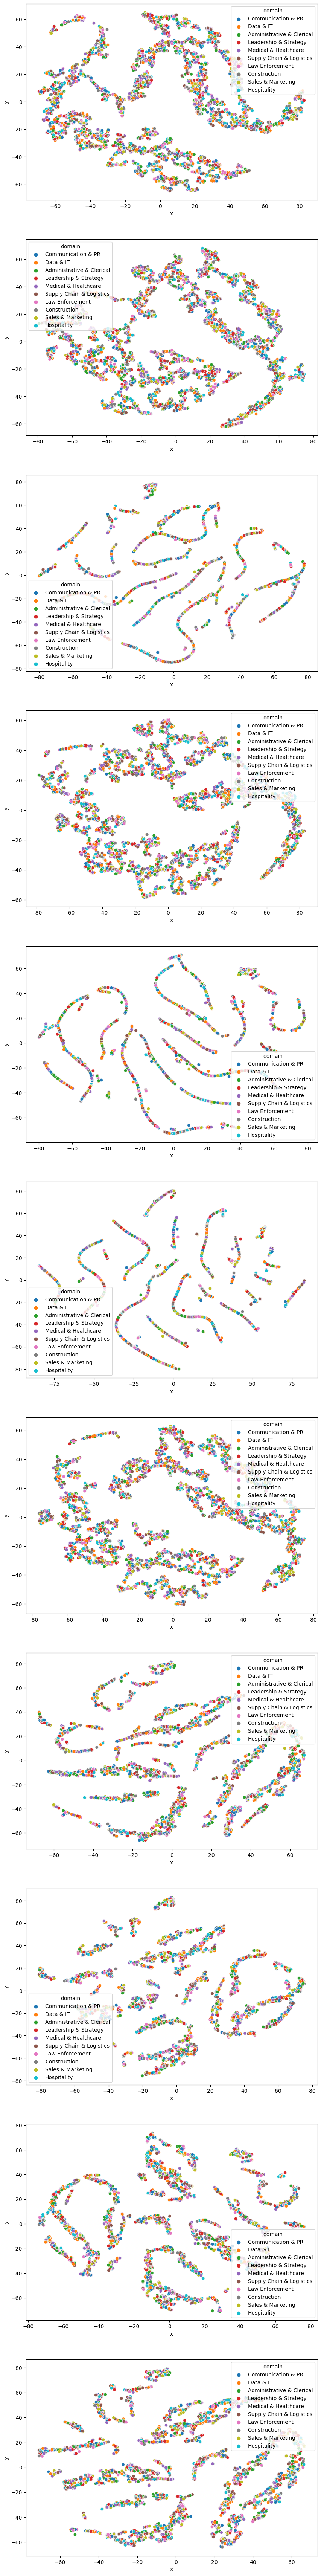

In [12]:
from matplotlib.pyplot import subplots
from seaborn import scatterplot
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

fig, ax = subplots(nrows=len(c), figsize=(10, 8*len(c)))
for index, item in enumerate(c):
    print(item)
    model_result = TSNE().fit_transform(X=MinMaxScaler(copy=True).fit_transform(X=df[list(item)].astype(float)))
    scatterplot(ax=ax[index], 
                data=pd.DataFrame(data={'x': model_result[:, 0],'y': model_result[:, 1],'domain': df['Domain'].values}),
                hue='domain', x='x', y='y',)

<Axes: >

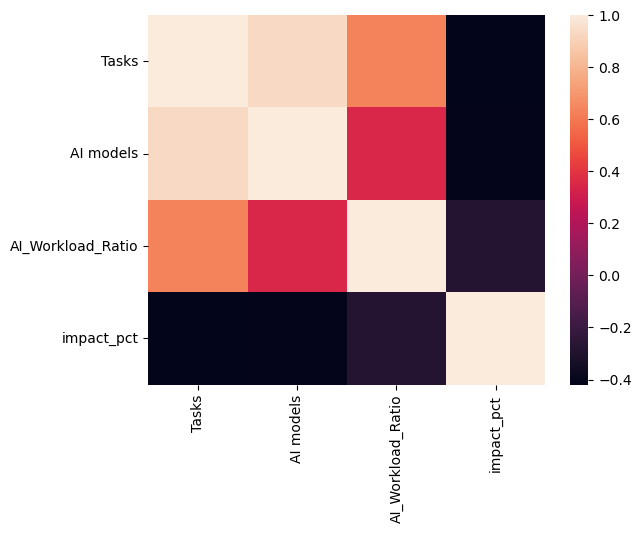

In [13]:
from seaborn import heatmap
heatmap(data=df.corr(numeric_only=True))